In [57]:
!pip3 install -r requirements.txt

  Using cached matplotlib-3.10.5-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.5-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 7.2 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.9-cp313-cp313-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl (4.7 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 25.0.1 -> 25

In [3]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [16]:
ratings_full_df = pd.read_csv('data/ratings.csv')
movies_df = pd.read_csv('data/movies.csv')

In [18]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [19]:
ratings_full_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [20]:
ratings_df = ratings_full_df[:200000]
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [21]:
mean_user_ratings = ratings_full_df.groupby("userId")["rating"].mean()
mean_user_ratings

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

In [22]:
ratings_df = ratings_df.merge(mean_user_ratings, how="left", on="userId", suffixes=("", "_user_mean"))
ratings_df

,userId,movieId,rating,timestamp,rating_user_mean
0,1,1,4.0,964982703,4.366379
1,1,3,4.0,964981247,4.366379
2,1,6,4.0,964982224,4.366379
3,1,47,5.0,964983815,4.366379
4,1,50,5.0,964982931,4.366379
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,3.688556
100832,610,168248,5.0,1493850091,3.688556
100833,610,168250,5.0,1494273047,3.688556
100834,610,168252,5.0,1493846352,3.688556


In [23]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### Добавим к movies средний рейтинг

In [24]:
mean_movie_ratings = ratings_full_df.groupby("movieId")["rating"].mean()
mean_movie_ratings

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [25]:
movies_df = movies_df.merge(mean_movie_ratings, how="left", on="movieId").rename({"rating":"ratings_movie_mean"}, axis=1)
movies_df

,movieId,title,genres,ratings_movie_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


### Обработаем таблицу с рейтингами

In [26]:
datetimes = pd.to_datetime(ratings_df['timestamp'], unit='s')

ratings_df['year'] = datetimes.dt.year
ratings_df['month'] = datetimes.dt.month
ratings_df['day'] = datetimes.dt.day
ratings_df['day_of_week'] = datetimes.dt.dayofweek
ratings_df['hour'] = datetimes.dt.hour

def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

ratings_df['part_of_day'] = ratings_df['hour'].apply(get_part_of_day)

ratings_df = pd.get_dummies(ratings_df, columns=['part_of_day'], prefix='time')

ratings_df = ratings_df.drop(columns=['timestamp'])
ratings_df.head(2)

,userId,movieId,rating,rating_user_mean,year,month,day,day_of_week,hour,time_afternoon,time_evening,time_morning,time_night
0,1,1,4.0,4.366379,2000,7,30,6,18,False,True,False,False
1,1,3,4.0,4.366379,2000,7,30,6,18,False,True,False,False


In [27]:
genres_list = movies_df['genres'].apply(lambda x: x.split('|'))
genres_list

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit(genres_list)
list(mlb.classes_)

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [35]:
mlb.transform(genres_list)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(9742, 20))

In [36]:
genre_encoded = pd.DataFrame(mlb.transform(genres_list),
                             columns=mlb.classes_,
                             index=movies_df.index)
genre_encoded.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
movies_encoded = pd.concat([movies_df.drop("genres", axis=1), genre_encoded], axis=1)
movies_encoded.head()

,movieId,title,ratings_movie_mean,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),3.920930,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),3.431818,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),3.259615,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),2.357143,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),3.071429,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df = ratings_df.merge(movies_encoded, how="left", on="movieId")
df

,userId,movieId,rating,rating_user_mean,year,month,day,day_of_week,hour,time_afternoon,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,4.366379,2000,7,30,6,18,False,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,4.366379,2000,7,30,6,18,False,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,4.366379,2000,7,30,6,18,False,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,4.366379,2000,7,30,6,19,False,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,4.366379,2000,7,30,6,18,False,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,3.688556,2017,5,3,2,21,False,...,0,1,0,0,0,0,0,1,0,0
100832,610,168248,5.0,3.688556,2017,5,3,2,22,False,...,0,0,0,0,0,0,0,1,0,0
100833,610,168250,5.0,3.688556,2017,5,8,0,19,False,...,0,1,0,0,0,0,0,0,0,0
100834,610,168252,5.0,3.688556,2017,5,3,2,21,False,...,0,0,0,0,0,0,1,0,0,0


In [39]:
mean_genres_by_users = pd.concat(
    [
        df["userId"],
        df[list(mlb.classes_)].multiply(df['rating'],axis=0)
    ], axis=1
).groupby("userId").mean()
df = df.merge(mean_genres_by_users, how="left", on="userId", suffixes=("", "_mean_gen"))

In [40]:
df

,userId,movieId,rating,rating_user_mean,year,month,day,day_of_week,hour,time_afternoon,...,Film-Noir_mean_gen,Horror_mean_gen,IMAX_mean_gen,Musical_mean_gen,Mystery_mean_gen,Romance_mean_gen,Sci-Fi_mean_gen,Thriller_mean_gen,War_mean_gen,Western_mean_gen
0,1,1,4.0,4.366379,2000,7,30,6,18,False,...,0.021552,0.254310,0.000000,0.443966,0.323276,0.482759,0.728448,0.982759,0.426724,0.129310
1,1,3,4.0,4.366379,2000,7,30,6,18,False,...,0.021552,0.254310,0.000000,0.443966,0.323276,0.482759,0.728448,0.982759,0.426724,0.129310
2,1,6,4.0,4.366379,2000,7,30,6,18,False,...,0.021552,0.254310,0.000000,0.443966,0.323276,0.482759,0.728448,0.982759,0.426724,0.129310
3,1,47,5.0,4.366379,2000,7,30,6,19,False,...,0.021552,0.254310,0.000000,0.443966,0.323276,0.482759,0.728448,0.982759,0.426724,0.129310
4,1,50,5.0,4.366379,2000,7,30,6,18,False,...,0.021552,0.254310,0.000000,0.443966,0.323276,0.482759,0.728448,0.982759,0.426724,0.129310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,3.688556,2017,5,3,2,21,False,...,0.033410,0.816052,0.228495,0.042243,0.347158,0.341014,0.705453,1.399770,0.136329,0.094854
100832,610,168248,5.0,3.688556,2017,5,3,2,22,False,...,0.033410,0.816052,0.228495,0.042243,0.347158,0.341014,0.705453,1.399770,0.136329,0.094854
100833,610,168250,5.0,3.688556,2017,5,8,0,19,False,...,0.033410,0.816052,0.228495,0.042243,0.347158,0.341014,0.705453,1.399770,0.136329,0.094854
100834,610,168252,5.0,3.688556,2017,5,3,2,21,False,...,0.033410,0.816052,0.228495,0.042243,0.347158,0.341014,0.705453,1.399770,0.136329,0.094854


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["rating", "title"], axis=1), df["rating"], test_size=0.2, random_state=41)

### Рекомендации на основе схожих пользователей

In [42]:
def get_most_popular_rating(X_train, y_train, X_test, userId, movieId):
    movie_data = X_train[X_train["movieId"] == movieId]
    if movie_data.empty:
        return y_train.mean()
    else:
        return movie_data.iloc[0]["ratings_movie_mean"]

In [43]:
predict = [get_most_popular_rating(X_train, y_train, X_test, userId, movieId) for userId, movieId in zip(X_test["userId"], X_test["movieId"])]
predict

[np.float64(3.731707317073171),
 np.float64(3.520408163265306),
 np.float64(3.2708333333333335),
 np.float64(3.4285714285714284),
 np.float64(3.496212121212121),
 np.float64(3.7662337662337664),
 np.float64(3.0416666666666665),
 np.float64(3.4285714285714284),
 np.float64(3.5015433629196213),
 np.float64(3.5057471264367814),
 np.float64(3.325),
 np.float64(3.8333333333333335),
 np.float64(4.1477272727272725),
 np.float64(3.625),
 np.float64(3.5980392156862746),
 np.float64(4.2890625),
 np.float64(4.237745098039215),
 np.float64(3.2205882352941178),
 np.float64(3.91),
 np.float64(3.8),
 np.float64(2.25),
 np.float64(4.429022082018927),
 np.float64(3.0),
 np.float64(3.857142857142857),
 np.float64(2.9956896551724137),
 np.float64(3.6375),
 np.float64(3.5),
 np.float64(2.1666666666666665),
 np.float64(3.2),
 np.float64(3.513888888888889),
 np.float64(3.892857142857143),
 np.float64(2.9),
 np.float64(4.035714285714286),
 np.float64(3.941860465116279),
 np.float64(3.9609929078014185),
 np.f

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import pandas as pd

def evaluate_model(predict, y_test):
    metrics = {
        "Mean Squared Error (MSE)": mean_squared_error(y_test, predict),
        "Mean Absolute Error (MAE)": mean_absolute_error(y_test, predict),
        "Mean Absolute Percentage Error (MAPE)": mean_absolute_percentage_error(y_test, predict) * 100,
        "R-squared (R²)": r2_score(y_test, predict)
    }
    results_df = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
    print("\nModel Evaluation Metrics:")
    print(results_df.to_string(index=False, float_format="%.4f"))

In [45]:
evaluate_model(predict, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.8168
            Mean Absolute Error (MAE)  0.7019
Mean Absolute Percentage Error (MAPE) 31.1713
                       R-squared (R²)  0.2526


In [46]:
print(r2_score(y_test, y_test))
print(r2_score(y_test, [y_train.mean()]*len(y_test)))

1.0
-4.243575268958466e-09


In [47]:
def get_recommendation(X_train, y_train, X_test, userId, movieId):
    movie_data = X_train[X_train["movieId"] == movieId]
    if movie_data.empty:
        return y_train.mean()
    user_data = X_test[X_test["userId"] == userId]

    movie_mean_rating = movie_data.iloc[0]["ratings_movie_mean"]
    user_mean_rating = user_data["rating_user_mean"].iloc[0]

    final_score = (0.5 * movie_mean_rating) + (0.5 * user_mean_rating)

    return final_score

In [48]:
predict = [get_recommendation(X_train, y_train, X_test, userId, movieId) for userId, movieId in zip(X_test["userId"], X_test["movieId"])]
evaluate_model(predict, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.7591
            Mean Absolute Error (MAE)  0.6779
Mean Absolute Percentage Error (MAPE) 30.8804
                       R-squared (R²)  0.3054


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["userId", "movieId", "rating", "title"], axis=1), df["rating"], test_size=0.2, random_state=41)

### Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predict = linear_model.predict(X_test)
predict

array([4.02219561, 3.23859845, 3.75135459, ..., 3.47926552, 3.97473934,
       4.34084378], shape=(20168,))

In [51]:
evaluate_model(predict, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.6404
            Mean Absolute Error (MAE)  0.6108
Mean Absolute Percentage Error (MAPE) 26.3998
                       R-squared (R²)  0.4140


### XGBoost

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

param_grid = {
    'max_depth': [7, 9, 10],         # Different depths for the trees
    'gamma': [0.1, 0.15, 0.3],         # Minimum loss reduction to make a split
    'alpha': [0.1, 0.15, 0.3],         # L1 regularization term on weights
    'reg_lambda': [1.5, 2, 2.5],          # L2 regularization term on weights
    'learning_rate': [0.02, 0.05, 0.1], # Learning rate
    'n_estimators': [200, 300, 400]   # Number of trees
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
# Best Parameters: {'reg_lambda': 2.5, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'alpha': 0.15}

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best Parameters: {'reg_lambda': 2.5, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'alpha': 0.15}


In [55]:
predict = best_model.predict(X_test)

In [56]:
evaluate_model(predict, y_test)


Model Evaluation Metrics:
                               Metric   Value
             Mean Squared Error (MSE)  0.5766
            Mean Absolute Error (MAE)  0.5756
Mean Absolute Percentage Error (MAPE) 24.0815
                       R-squared (R²)  0.4724


<BarContainer object of 51 artists>

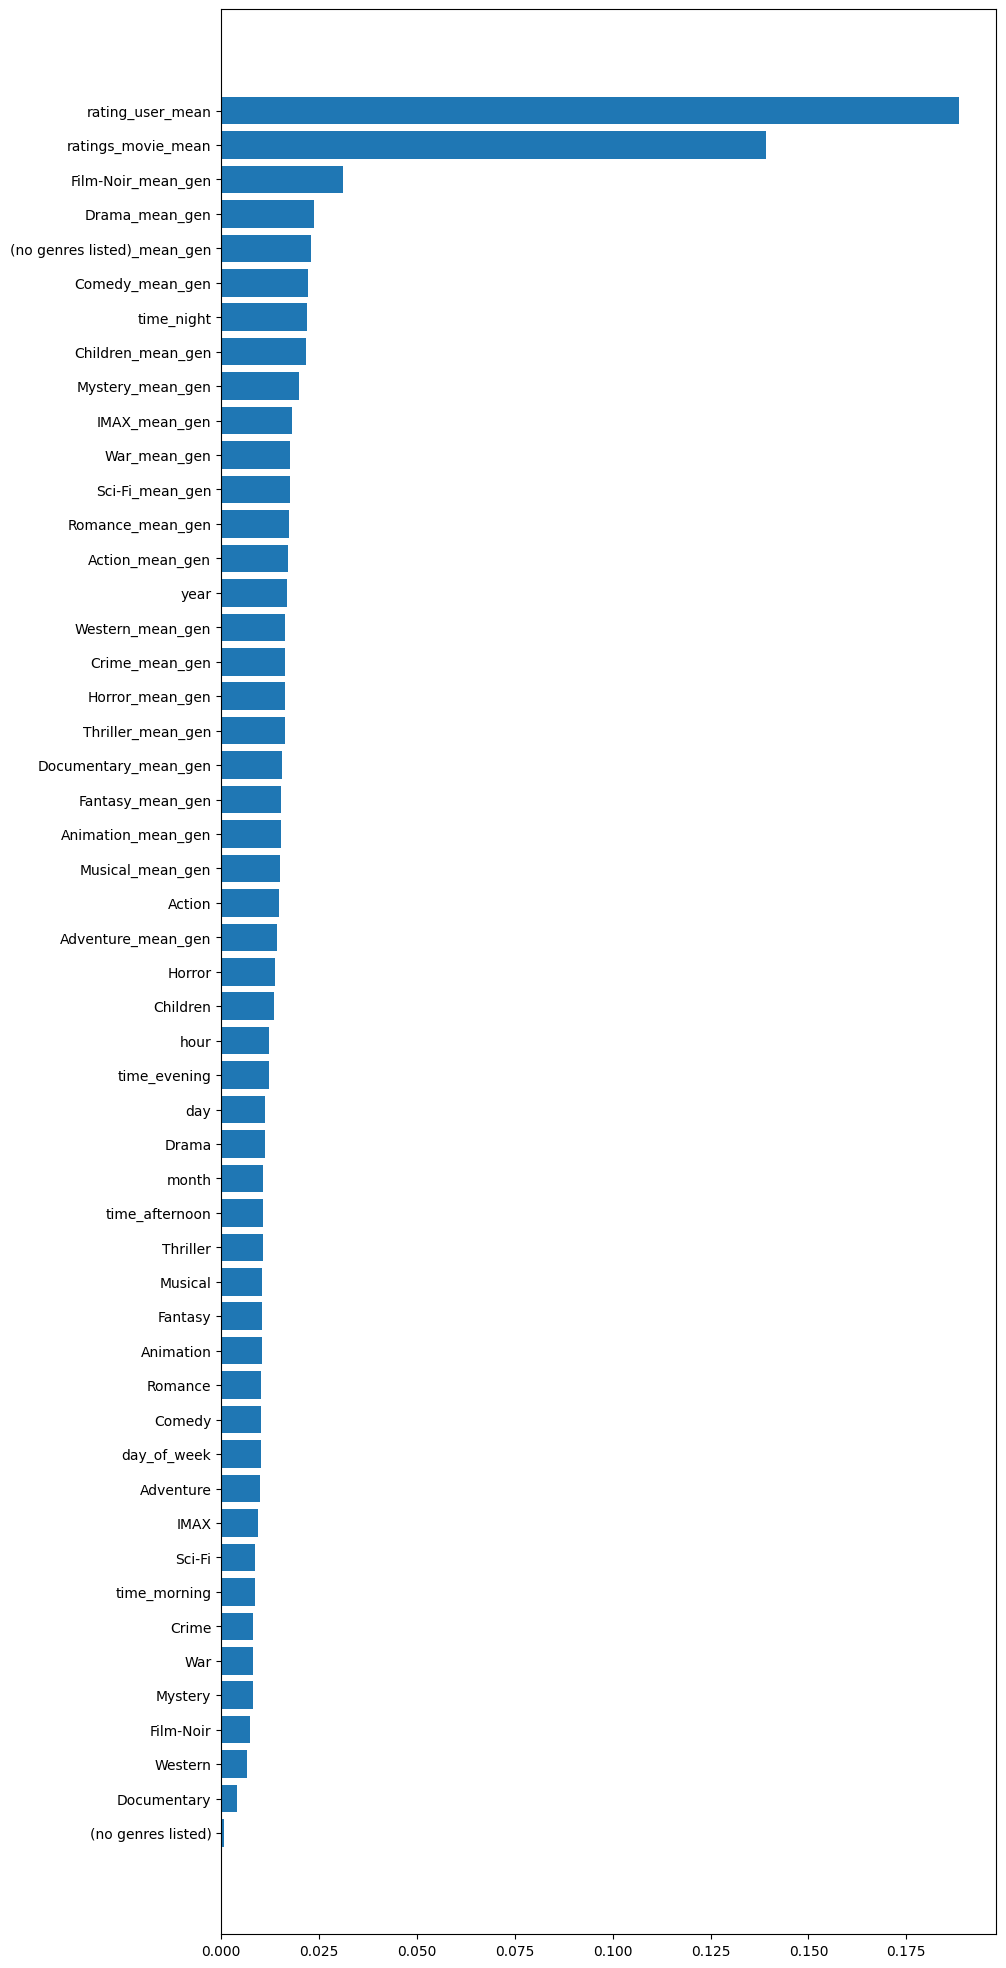

In [58]:
import matplotlib.pyplot as plt

best_model.feature_importances_
sorted_idx = best_model.feature_importances_.argsort()
plt.figure(figsize=(10,25))
plt.barh(X_test.columns[sorted_idx], best_model.feature_importances_[sorted_idx])

In [59]:
print(ratings_df[ratings_df["userId"] == 2].merge(movies_df, how="left", on="movieId")[["movieId", "rating", "title"]].to_string())

    movieId  rating                                                 title
0       318     3.0                      Shawshank Redemption, The (1994)
1       333     4.0                                      Tommy Boy (1995)
2      1704     4.5                              Good Will Hunting (1997)
3      3578     4.0                                      Gladiator (2000)
4      6874     4.0                              Kill Bill: Vol. 1 (2003)
5      8798     3.5                                     Collateral (2004)
6     46970     4.0    Talladega Nights: The Ballad of Ricky Bobby (2006)
7     48516     4.0                                  Departed, The (2006)
8     58559     4.5                               Dark Knight, The (2008)
9     60756     5.0                                  Step Brothers (2008)
10    68157     4.5                           Inglourious Basterds (2009)
11    71535     3.0                                     Zombieland (2009)
12    74458     4.0                   

In [60]:
df[df["userId"]==2].iloc[3]

userId                                        2
movieId                                    3578
rating                                      4.0
rating_user_mean                       3.948276
year                                       2015
month                                        10
day                                          24
day_of_week                                   5
hour                                         19
time_afternoon                            False
time_evening                               True
time_morning                              False
time_night                                False
title                          Gladiator (2000)
ratings_movie_mean                     3.938235
(no genres listed)                            0
Action                                        1
Adventure                                     1
Animation                                     0
Children                                      0
Comedy                                  

In [61]:
best_model.predict([df[df["userId"]==2].iloc[3].drop(["userId", "movieId", "title", "rating"])])

array([3.8613687], dtype=float32)

In [62]:
movies_df[movies_df["movieId"]==150]

,movieId,title,genres,ratings_movie_mean
123,150,Apollo 13 (1995),Adventure|Drama|IMAX,3.845771
